## Este ejercicio tiene como objetivo explicar la construccion de un modelo de K-Means para realizar la clasificación de dígitos en imágenes usando K-means y la librería Sklearn

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from scipy.spatial import distance

In [3]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
digits = load_digits()
digits.data.shape

(1797, 64)

In [4]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=0,stratify = digits.target)

In [5]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(Xtrain)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
kmeans.cluster_centers_

array([[ 0.00000000e+00,  2.98507463e-02,  4.18656716e+00,
         1.31492537e+01,  1.11343284e+01,  2.94776119e+00,
         3.73134328e-02,  1.38777878e-17,  4.33680869e-18,
         8.95522388e-01,  1.24701493e+01,  1.31716418e+01,
         1.12835821e+01,  1.13805970e+01,  1.03731343e+00,
         1.94289029e-16, -1.73472348e-18,  3.79104478e+00,
         1.39925373e+01,  5.29104478e+00,  2.20895522e+00,
         1.22686567e+01,  3.64179104e+00, -5.55111512e-17,
         0.00000000e+00,  5.23880597e+00,  1.25746269e+01,
         2.17910448e+00,  2.98507463e-01,  9.31343284e+00,
         6.34328358e+00,  4.33680869e-19,  0.00000000e+00,
         5.90298507e+00,  1.14402985e+01,  8.95522388e-01,
         1.49253731e-02,  9.12686567e+00,  7.04477612e+00,
         0.00000000e+00, -4.33680869e-18,  3.52985075e+00,
         1.31940299e+01,  1.69402985e+00,  1.46268657e+00,
         1.15149254e+01,  5.71641791e+00, -1.04083409e-17,
        -2.16840434e-18,  8.58208955e-01,  1.32686567e+0

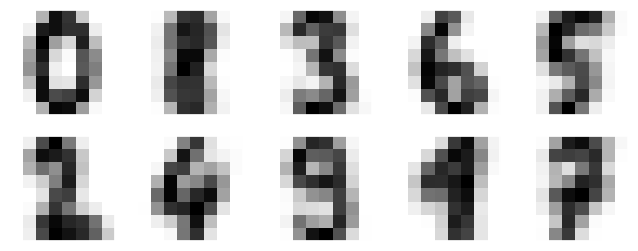

In [7]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
numbers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, number in zip(ax.flat, numbers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(number, interpolation='nearest', cmap=plt.cm.binary)

cluster 0
45 elementos


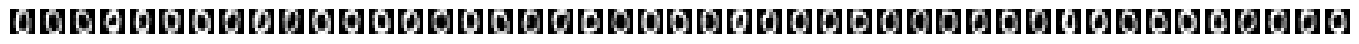

cluster 1
58 elementos


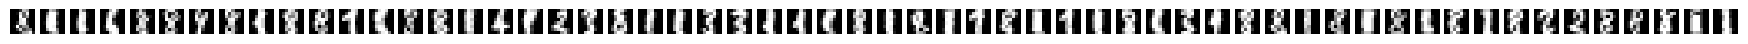

cluster 2
45 elementos


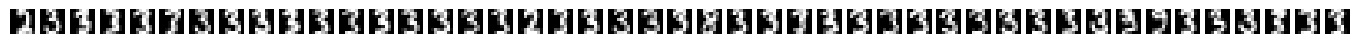

cluster 3
44 elementos


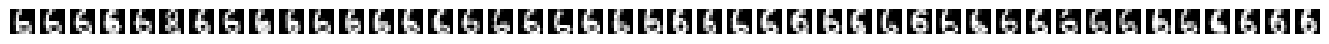

cluster 4
41 elementos


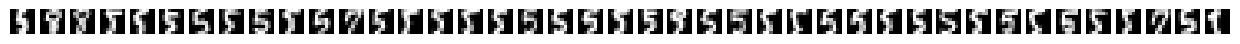

cluster 5
38 elementos


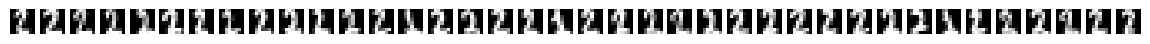

cluster 6
38 elementos


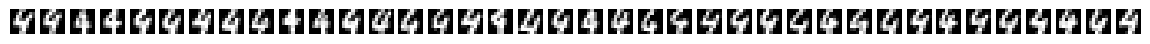

cluster 7
61 elementos


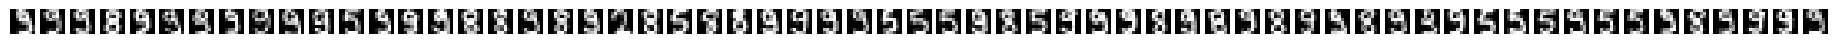

cluster 8
28 elementos


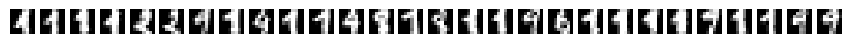

cluster 9
52 elementos


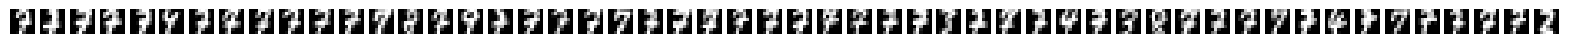

In [8]:
ypred = kmeans.predict(Xtest)

for i in range(0,10):

    row = np.where(ypred==i)[0]  # las filas en ypred que corresponden al cluster i
    num = row.shape[0]       #  Elementos de cada cluster
    r = int(np.floor(num/65))    #  Numero de filas para las figuras en el plot

    print("cluster "+str(i))
    print(str(num)+" elementos")

    plt.figure(figsize=(25,5))
    for k in range(0, num):
        plt.subplot(r+1, 65, k+1)
        image = Xtest[row[k], ]
        image = image.reshape(8, 8)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()